# Sea Level Predictor

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

### Use the data to complete the following tasks:

* Use Pandas to import the data from epa-sea-level.csv.


* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.


* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [2]:
# extract data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/epa-sea-level.csv')
df.shape

(134, 5)

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [36]:
# prepare variables
# best fit (1)
x = df.Year
y = df['CSIRO Adjusted Sea Level']

# best fit (2)
xx = df[ df['Year'] >= 2000 ]['Year']
yy = df[ df['Year'] >= 2000 ]['CSIRO Adjusted Sea Level']


xx.min()

2000

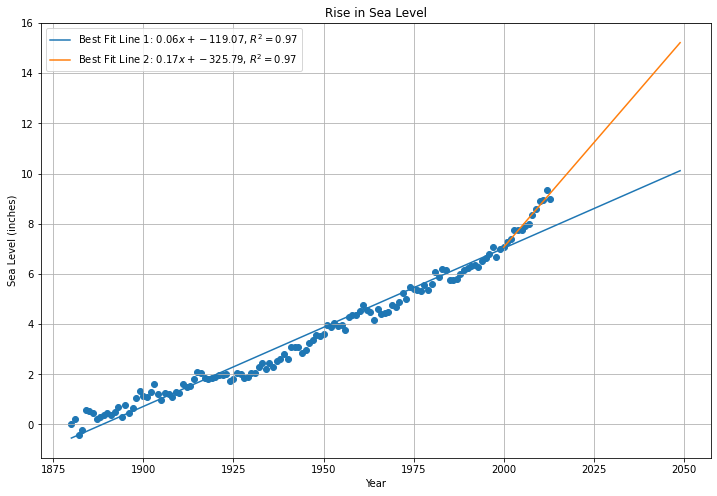

In [33]:
# scatter plot

# -- figure(1)
plt.figure(1, figsize = (12, 8))
ax = plt.subplot()
ax.scatter(x, y)

# best fit (1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

line_x1 = np.arange(x.min(), 2050)
line_y1 = slope * line_x1 + intercept  #line_y1 = slope * line_x1 + intercept

plt.plot(line_x1, line_y1, label = 'Best Fit Line 1: $%.2fx + %.2f$, $R^2=%.2f$' % (slope, intercept, r_value ** 2))


# best fit (2)
fit2 = stats.linregress(xx, yy)
slope2 = fit2.slope
intercept2 = fit2.intercept

line_x2 = np.arange(xx.min(), 2050)
line_y2 = slope2 * line_x2 + intercept2  #line_y1 = slope * line_x1 + intercept

plt.plot(line_x2, line_y2, label = 'Best Fit Line 2: $%.2fx + %.2f$, $R^2=%.2f$' % (slope2, intercept2, r_value ** 2))


# display
plt.legend(loc = 'best')
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.grid()
#plt.savefig(save_path) 